In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading the Dataset

In [180]:
df = pd.read_csv(r"C:\Users\Maheen\Downloads\car_data.csv")

In [181]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [183]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Checking for Null Values

In [184]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


# Feature Engineering

In [185]:
df['Car_Age'] = 2025 - df['Year']

# Data Preprocessing: One-Hot Encoding

In [186]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)


# Features and Target Variable

In [187]:
X = df.drop(columns=['Car_Name', 'Selling_Price', 'Year']) 
y = df['Selling_Price'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the Data into Training and Testing Sets

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Random Forest Regressor

In [189]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [190]:

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


 # Evaluation Result

In [191]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.6151475409836066
Mean Squared Error: 0.8689574491803268
Root Mean Squared Error: 0.9321788718804599
R^2 Score: 0.9622776036607653


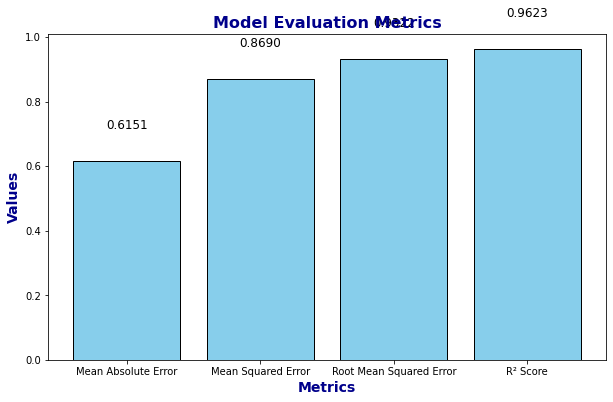

In [192]:
metrics = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R² Score']
values = [mae, mse, rmse, r2]

plt.figure(figsize=(10, 6))

plt.bar(metrics, values, color='skyblue', edgecolor='black')

plt.title('Model Evaluation Metrics', fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel('Values', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Metrics', fontsize=14, fontweight='bold', color='darkblue')

for i, value in enumerate(values):
    plt.text(i, value + 0.1, f'{value:.4f}', ha='center', fontsize=12, color='black')

plt.show()

# Actual vs Predicted Prices

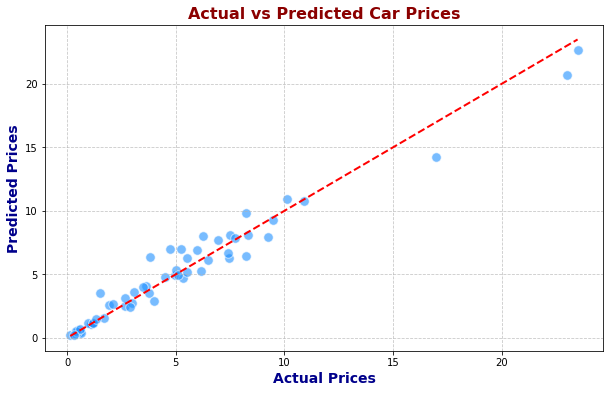

In [193]:
plt.figure(figsize=(10, 6))  
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.6, edgecolors="w", s=90, marker='o') 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

plt.xlabel('Actual Prices', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Predicted Prices', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Actual vs Predicted Car Prices', fontsize=16, fontweight='bold', color='darkred')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()